#### Greg Walsh
#### DSSA-5104-091 - DEEP LEARNING
#### Spring 2020 
#### A demonstration of overfitting
#### with a simple polynomial fit
#### (not a neural network!!)

Total dataset has  4177  data points
Will use a random sample of only  100  data points


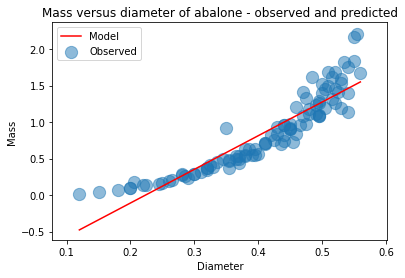

Fitted model is  1 st order
y = 
 
4.604 x - 1.029


In [47]:
# import libraries that are required
import numpy as np
import sys
import matplotlib.pyplot as plt

# Load data from file into N by 2 numpy array
filename = "abalone.data.txt"
X = np.loadtxt( filename, delimiter=',', usecols=(2,4) )

# Put first column into N by 1 array called diameter
# and second column into N by 1 array called mass_observed
diameter = X[:,0]
mass_observed = X[:,1]

# I don't want to use all the data so I use the numpy function
# called random.choice to generate 10 random indices out of a total
# of diameter.size indices. Then I create smaller sample vectors that
# are just 10 in size from the complete dataset
np.random.seed(10)
print('Total dataset has ',diameter.size,' data points')
sample_size = 100
print('Will use a random sample of only ',sample_size,' data points')
sample_indices = np.random.choice(diameter.size,sample_size)
diameter_sample = diameter[sample_indices]
mass_observed_sample = mass_observed[sample_indices]

# Set the degree of the polynomial you wish for your model
# degree_of_polynomial_to_fit = 1 is a linear model y = a x + b
# degree_of_polynomial_to_fit = 2 is a quadratic model y = a x^2 + b x + c
# degree_of_polynomial_to_fit = 3 is a cubic model y = a x^3 + b x^2 + c x + d
# etc.
degree_of_polynomial_to_fit = 1

# Fit the polynomial model using the numpy polyfit function
# It returns the coefficients of an n-th degree polynomial
# that fits your data. A very useful numpy function to know!!
coefficients = np.polyfit(diameter_sample, mass_observed_sample, degree_of_polynomial_to_fit)

# I want to plot the model as a line plot so I generate a large 
# set of ordered diameter values for which I can find corresponding
# model mass predictions using the polynomial function I just fitted
diameter_sample_for_plot = np.linspace(diameter_sample.min(),diameter_sample.max(),100)

# Use the fitted model coefficients to create the model function
model_for_mass = np.poly1d(coefficients)

# Make predictions for mass using the model function and the diameter values I generated earlier
mass_prediction = model_for_mass(diameter_sample_for_plot)

# Now I can do the plots
plt.scatter(diameter_sample,mass_observed_sample, marker = 'o', s=150, alpha = 0.5,label='Observed')
plt.plot(diameter_sample_for_plot,mass_prediction,color='red',label='Model')

#plt.text(0.05,2.2,str(loss))
plt.xlabel('Diameter')
plt.ylabel('Mass')
plt.title('Mass versus diameter of abalone - observed and predicted')
plt.legend(loc='best')

#plt.savefig("abalone.png")
plt.show()

if degree_of_polynomial_to_fit == 1:
    s='st order'
elif degree_of_polynomial_to_fit == 2:
    s='nd order'
else:
    s='th order'
    
print('Fitted model is ',degree_of_polynomial_to_fit,s)
print('y = ')
print(model_for_mass)

In [45]:
def polynomial_fit(i):
    degree_of_polynomial_to_fit = i
    coefficients = np.polyfit(diameter_sample, mass_observed_sample, degree_of_polynomial_to_fit)
    diameter_sample_for_plot = np.linspace(diameter_sample.min(),diameter_sample.max(),100)
    model_for_mass = np.poly1d(coefficients)
    mass_prediction_for_plot = model_for_mass(diameter_sample_for_plot)
    print("--------------------------------------------------------------")
    if i == 1:
        print("y= ", model_for_mass)
        print("fitted model is",degree_of_polynomial_to_fit,"st order")
    if i == 2:
        print("y= ", model_for_mass)
        print("fitted model is ",degree_of_polynomial_to_fit,"nd order")
    if i == 3:
        print("y= ", model_for_mass)
        print("fitted model is ",degree_of_polynomial_to_fit,"rd order")
    if i > 3 :
        print("y= ", model_for_mass)
        print("fitted model is ",degree_of_polynomial_to_fit,"th order")
    plt.scatter(diameter_sample,mass_observed_sample, marker = 'o', s=150, alpha = 0.5,label='Observed')
    plt.plot(diameter_sample_for_plot,mass_prediction_for_plot,color='red',label='Model')
    plt.xlabel('Diameter')
    plt.ylabel('Mass')
    plt.title('Mass versus diameter of abalone - observed and predicted')
    plt.legend(loc='best')
    plt.show()

--------------------------------------------------------------
y=   
5.411 x - 1.368
fitted model is 1 st order


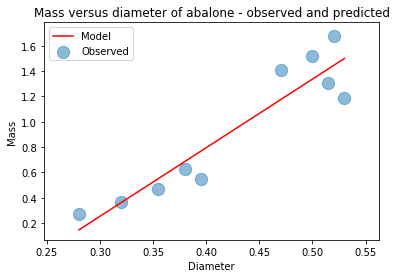

--------------------------------------------------------------
y=         2
4.535 x + 1.648 x - 0.6226
fitted model is  2 nd order


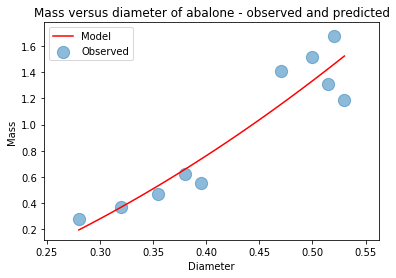

--------------------------------------------------------------
y=          3         2
-344.5 x + 419.2 x - 160.5 x + 19.98
fitted model is  3 rd order


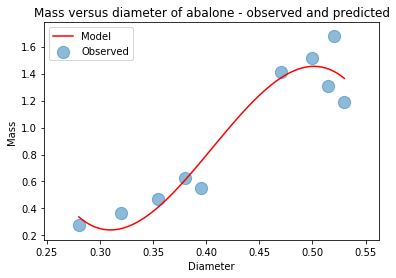

--------------------------------------------------------------
y=         4        3        2
-3637 x + 5588 x - 3151 x + 777.3 x - 70.68
fitted model is  4 th order


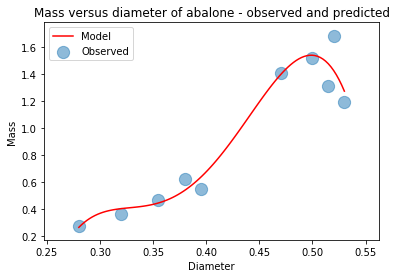

--------------------------------------------------------------
y=              5             4             3        2
-1.715e+04 x + 3.103e+04 x - 2.208e+04 x + 7748 x - 1340 x + 91.67
fitted model is  5 th order


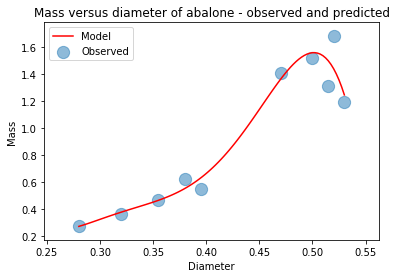

--------------------------------------------------------------
y=             6            5             4             3             2
1.557e+05 x - 4.02e+05 x + 4.234e+05 x - 2.333e+05 x + 7.103e+04 x - 1.134e+04 x + 743.2
fitted model is  6 th order


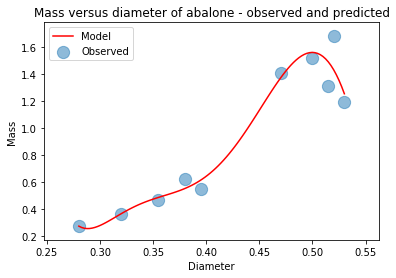

--------------------------------------------------------------
y=              7            6             5             4             3
-1.103e+07 x + 3.18e+07 x - 3.901e+07 x + 2.638e+07 x - 1.062e+07 x
              2
 + 2.543e+06 x - 3.354e+05 x + 1.879e+04
fitted model is  7 th order


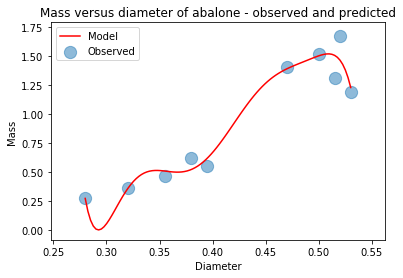

--------------------------------------------------------------
y=              8             7             6             5             4
-4.776e+08 x + 1.587e+09 x - 2.293e+09 x + 1.881e+09 x - 9.577e+08 x
            3             2
 + 3.1e+08 x - 6.228e+07 x + 7.098e+06 x - 3.514e+05
fitted model is  8 th order


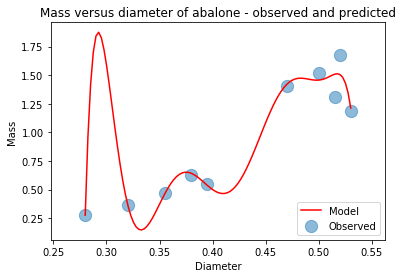

--------------------------------------------------------------
y=             9             8             7             6             5
-6.24e+10 x + 2.335e+11 x - 3.862e+11 x + 3.707e+11 x - 2.274e+11 x
             4             3             2
 + 9.25e+10 x - 2.494e+10 x + 4.296e+09 x - 4.293e+08 x + 1.895e+07
fitted model is  9 th order


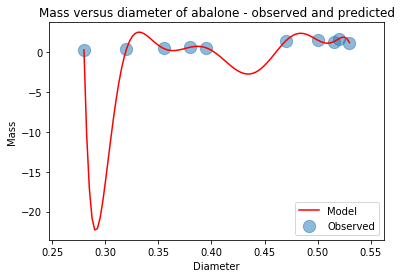

/Users/gregwalsh/opt/anaconda3/envs/DSSAPYTHON/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
--------------------------------------------------------------
y=              10             9             8             7             6
-6.043e+10 x  + 1.954e+11 x - 2.589e+11 x + 1.685e+11 x - 3.753e+10 x
             5             4             3           2
 - 2.25e+10 x + 2.142e+10 x - 8.121e+09 x + 1.7e+09 x - 1.929e+08 x + 9.322e+06
fitted model is  10 th order


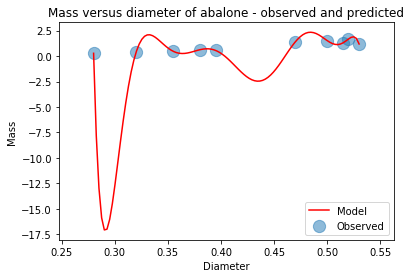

In [46]:
for i in range(1,11):
    polynomial_fit(i)

In [ ]:
### With a 10 random number sample 
### 1-3 degree polynomials are underfitting
### 4-6 degree polynomials are good fitting 
### 7-10 degree polynomials are overfitting.

In [48]:
def polynomial_fit(i):
    degree_of_polynomial_to_fit = i
    coefficients = np.polyfit(diameter_sample, mass_observed_sample, degree_of_polynomial_to_fit)
    diameter_sample_for_plot = np.linspace(diameter_sample.min(),diameter_sample.max(),100)
    model_for_mass = np.poly1d(coefficients)
    mass_prediction_for_plot = model_for_mass(diameter_sample_for_plot)
    print("--------------------------------------------------------------")
    if i == 1:
        print("y= ", model_for_mass)
        print("fitted model is",degree_of_polynomial_to_fit,"st order")
    if i == 2:
        print("y= ", model_for_mass)
        print("fitted model is ",degree_of_polynomial_to_fit,"nd order")
    if i == 3:
        print("y= ", model_for_mass)
        print("fitted model is ",degree_of_polynomial_to_fit,"rd order")
    if i > 3 :
        print("y= ", model_for_mass)
        print("fitted model is ",degree_of_polynomial_to_fit,"th order")
    plt.scatter(diameter_sample,mass_observed_sample, marker = 'o', s=150, alpha = 0.5,label='Observed')
    plt.plot(diameter_sample_for_plot,mass_prediction_for_plot,color='red',label='Model')
    plt.xlabel('Diameter')
    plt.ylabel('Mass')
    plt.title('Mass versus diameter of abalone - observed and predicted')
    plt.legend(loc='best')
    plt.show()

--------------------------------------------------------------
y=   
4.604 x - 1.029
fitted model is 1 st order


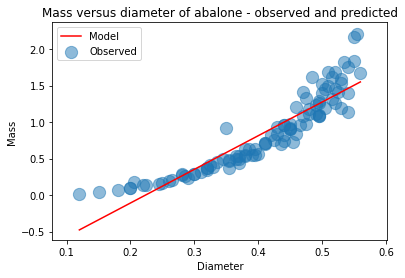

--------------------------------------------------------------
y=         2
11.74 x - 4.171 x + 0.4672
fitted model is  2 nd order


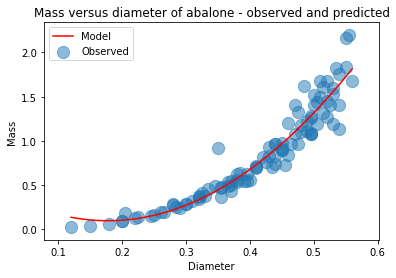

--------------------------------------------------------------
y=         3         2
20.24 x - 9.977 x + 3.072 x - 0.2648
fitted model is  3 rd order


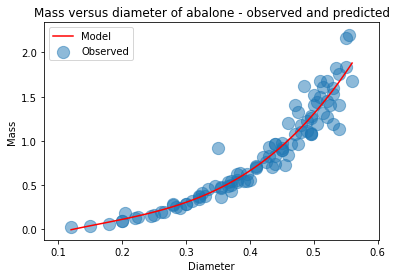

--------------------------------------------------------------
y=         4         3         2
31.31 x - 23.76 x + 11.96 x - 1.465 x + 0.05709
fitted model is  4 th order


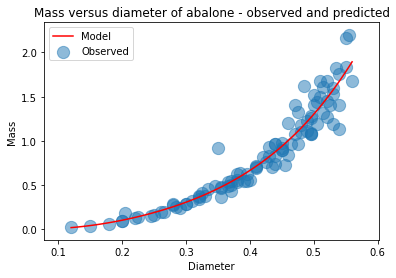

--------------------------------------------------------------
y=          5         4         3         2
-45.98 x + 111.3 x - 76.89 x + 28.67 x - 3.926 x + 0.1912
fitted model is  5 th order


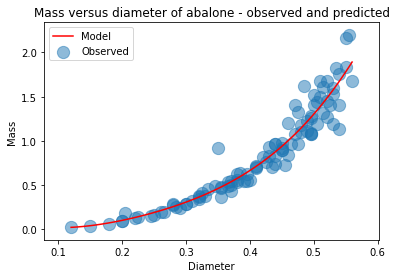

--------------------------------------------------------------
y=        6        5        4        3         2
2055 x - 4332 x + 3700 x - 1612 x + 380.2 x - 44.45 x + 2.012
fitted model is  6 th order


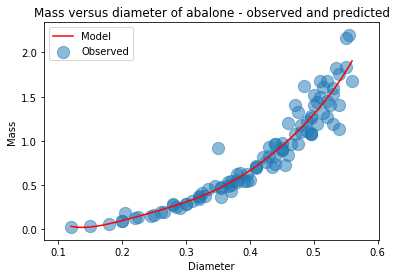

--------------------------------------------------------------
y=             7             6             5            4             3
7.392e+04 x - 1.778e+05 x + 1.775e+05 x - 9.49e+04 x + 2.923e+04 x
         2
 - 5159 x + 481.5 x - 18.24
fitted model is  7 th order


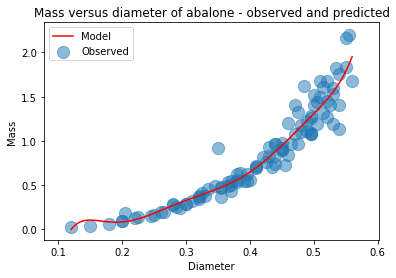

--------------------------------------------------------------
y=             8             7             6             5             4
7.404e+05 x - 1.974e+06 x + 2.233e+06 x - 1.397e+06 x + 5.267e+05 x
              3             2
 - 1.223e+05 x + 1.702e+04 x - 1296 x + 41.27
fitted model is  8 th order


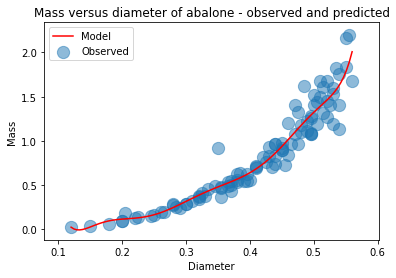

--------------------------------------------------------------
y=              9            8             7             6             5
-9.611e+05 x + 3.74e+06 x - 6.035e+06 x + 5.357e+06 x - 2.898e+06 x
              4             3             2
 + 9.932e+05 x - 2.157e+05 x + 2.863e+04 x - 2105 x + 65.32
fitted model is  9 th order


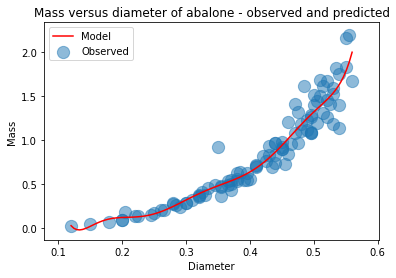

--------------------------------------------------------------
y=              10             9             8             7             6
-5.997e+07 x  + 2.073e+08 x - 3.151e+08 x + 2.766e+08 x - 1.551e+08 x
              5             4             3             2
 + 5.795e+07 x - 1.458e+07 x + 2.438e+06 x - 2.585e+05 x + 1.569e+04 x - 413.6
fitted model is  10 th order


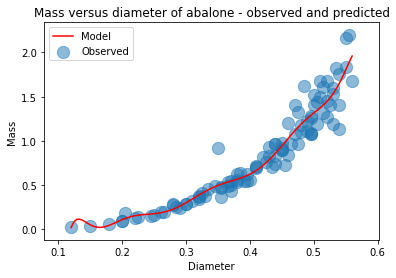

In [49]:
for i in range(1,11):
    polynomial_fit(i)

In [ ]:
### For the sample of 100 random points
### 1st degree polynomials has underfitting 
### 7 - 10th degree polynomials are overfitting 